In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_percentage_error

In [2]:
file_path = "StudentsPerformance_with_headers.csv"
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())

  STUDENT ID  Student Age  Sex  Graduated high-school type  Scholarship type  \
0   STUDENT1            2    2                           3                 3   
1   STUDENT2            2    2                           3                 3   
2   STUDENT3            2    2                           2                 3   
3   STUDENT4            1    1                           1                 3   
4   STUDENT5            2    2                           1                 3   

   Additional work  Regular artistic or sports activity  \
0                1                                    2   
1                1                                    2   
2                2                                    2   
3                1                                    2   
4                2                                    2   

   Do you have a partner  Total salary if available  \
0                      2                          1   
1                      2                          1   

In [3]:
df.shape

(145, 33)

In [4]:
df.isnull().sum()

STUDENT ID                                                           0
Student Age                                                          0
Sex                                                                  0
Graduated high-school type                                           0
Scholarship type                                                     0
Additional work                                                      0
Regular artistic or sports activity                                  0
Do you have a partner                                                0
Total salary if available                                            0
Transportation to the university                                     0
Accommodation type in Cyprus                                         0
Mother’s education                                                   0
Father’s education                                                   0
Number of sisters/brothers                                           0
Parent

In [5]:
# Define features and target variable
features = [
    'Student Age', 'Sex', 'Graduated high-school type', 'Scholarship type',
    'Additional work', 'Regular artistic or sports activity', 'Do you have a partner',
    'Total salary if available', 'Transportation to the university',
    'Preparation to midterm exams 1', 'Preparation to midterm exams 2',
    'Taking notes in classes', 'Listening in classes',
    'Discussion improves my interest and success in the course',
    'Flip-classroom', 'Cumulative grade point average in the last semester (/4.00)'
]

X = df[features]
y = df['Expected Cumulative grade point average in the graduation (/4.00)']

# Split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [6]:
# Make predictions
y_pred = model.predict(X_test)

In [7]:
# Calcul du coefficient de détermination (R²)
r2 = r2_score(y_test, y_pred)
r2

0.27103056101734

In [8]:
# Calcul du coefficient de corrélation R
r = np.sqrt(r2)
r

np.float64(0.5206059556107094)

In [9]:
# Calcul du MSE
mse = mean_squared_error(y_test, y_pred)
mse

0.3709856360102003

In [10]:
# Calcul du RMSE
rmse = np.sqrt(mse)
rmse

np.float64(0.6090859019959338)

In [11]:
# Calcul du MAPE
error = mean_absolute_percentage_error(y_test, y_pred)

# Calcul de la précision dérivée du MAPE
print(f'Accuracy of Linear Regression is {((1 - error) * 100):.2f}%')

Accuracy of Linear Regression is 79.31%


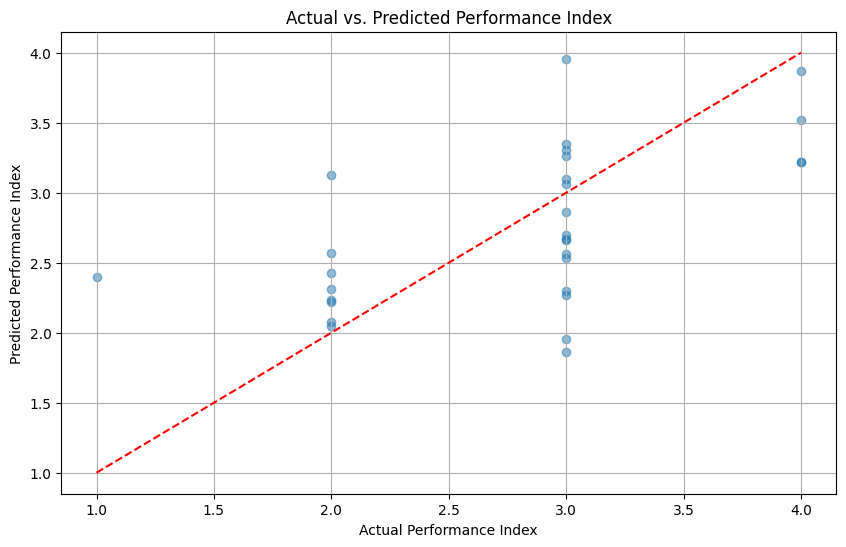

In [12]:
# Scatter plot of Actual vs. Predicted Performance Index
plt.figure(figsize=(10, 6))
plt.scatter(y_test, model.predict(X_test), alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel("Actual Performance Index")
plt.ylabel("Predicted Performance Index")
plt.title("Actual vs. Predicted Performance Index")
plt.grid(True)
plt.show()

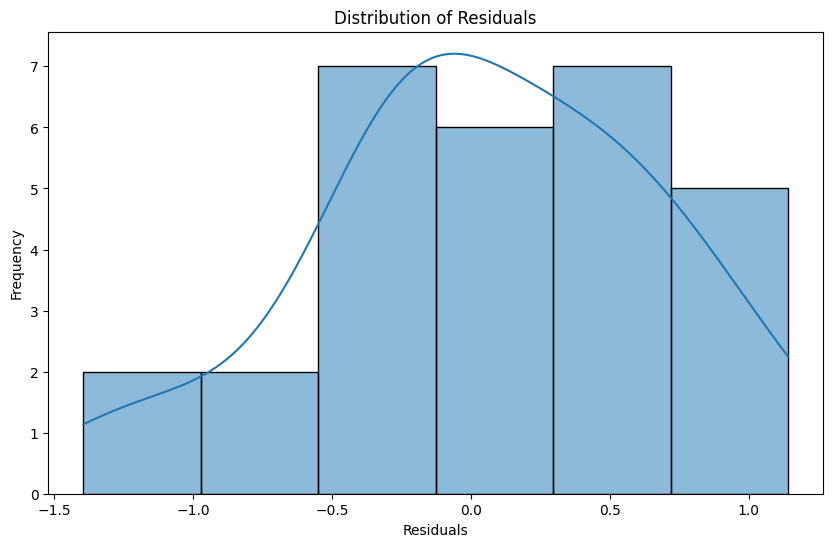

In [13]:
# Residuals plot
residuals = y_test - model.predict(X_test)
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()

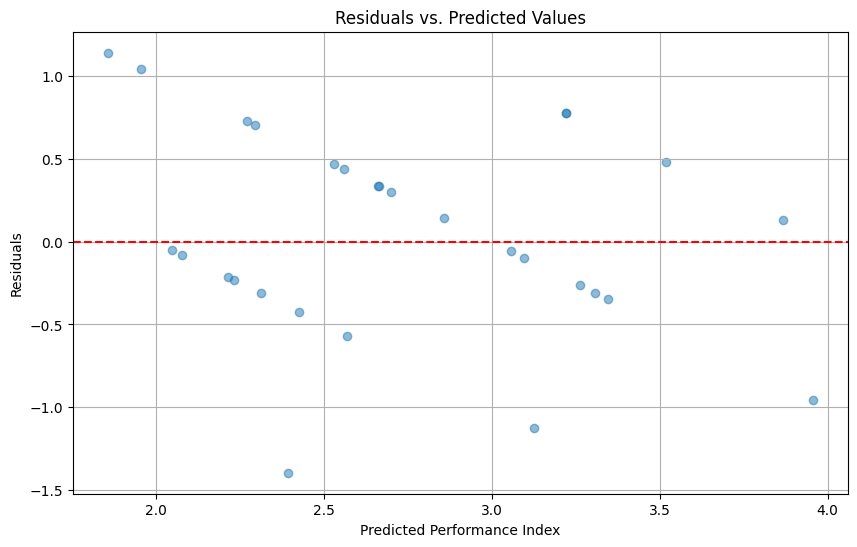

In [14]:
# Residuals vs. Predicted values plot
plt.figure(figsize=(10, 6))
plt.scatter(model.predict(X_test), residuals, alpha=0.5)
plt.xlabel("Predicted Performance Index")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")
plt.axhline(y=0, color='r', linestyle='--')
plt.grid(True)
plt.show()